## Customer Churn Prediction in Telecommunication: Proactive Strategies for Sustainable Growth

## Introduction

In the dynamic world of telecommunications, customer churn remains a pressing challenge for companies striving to achieve sustained success. Customers have alot of options and evolving preferences, accurately predicting churn has become important to retain and satisfy them. Customer churn is basically the loss of customers.

In this project, we use Supervised Machine Learning (classification) to explore the significance of churn analytics as a strategic tool for telecommunication companies to proactively identify potential risk factors for churn, optimize retention efforts, and cultivate lasting customer relationships. By leveraging data-driven insights and advanced analytics, companies can gain a competitive edge and ensure sustainable growth in an ever-changing industry.

# 1. Business Understanding
The churn analytics predictive model is a data-driven solution designed to address the persistent challenge of customer churn in subscription-based industries. This model aims to identify customers at risk of churn, enabling businesses to take proactive measures and implement targeted retention strategies. 

The primary objective is to reduce customer churn rates and retain valuable customers by providing insights into customer behavior, preferences, and patterns. Utilizing machine learning models such as logistic regression and decision trees, the model evaluates the data to build accurate predictions. 

Its performance is assessed through metrics like accuracy, precision, recall and F1-score. Armed with the model's insights, businesses can create personalized offers, marketing campaigns, and proactive customer support initiatives, thus improving customer satisfaction and fostering loyalty. 

## Hypothesis

**Null Hypothesis (H0)**:
"There is no significant relationship between customer tenure and churn rate in the telecom company."

**Alternative Hypothesis (Ha)**:
"There is a significant relationship between customer tenure and churn rate in the telecom company."

## Research Questions

1. How does customer tenure relate to churn rates? Are long-tenured customers more likely to stay with the company, and do new customers exhibit higher churn behavior?

2. Is there a correlation between the total charges and churn rates? Do customers with higher total charges exhibit different churn behavior compared to those with lower total charges

3. What is the impact of contract type on churn rates? Do customers on long-term contracts have significantly lower churn rates compared to those on short-term contracts?

4. Are there significant differences in churn behavior between customers who have device protection and those who don't?

5. What is the relationship between the availability of tech support and churn rates? Are customers with access to tech support more likely to remain with the company?

6. Do streaming services play a role in customer churn? Are customers with streaming services, such as StreamingTV and StreamingMovies, more likely to stay with the company?

7. How does the choice of payment method impact churn rates? Are customers with specific payment methods more prone to churn than others?


# 2. Data Understanding

## Installing libraries  and Packages
Here is the section to import all the packages/libraries that will be used through this notebook.

In [1]:
# %pip install pyodbc
# %pip install python-dotenv 
# %pip install openpyxl
# %pip install imbalanced-learn
# %pip install -U kaleido

In [2]:
# Database connections

import pyodbc 
from dotenv import dotenv_values #import the dotenv_values function from the dotenv package
import warnings 
warnings.filterwarnings('ignore')

# Data handling
import pandas as pd
pd.set_option('display.max_columns', None)
import openpyxl
import numpy as np

# Vizualisation (Matplotlib, Plotly, Seaborn, etc. )
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.colors as colors
from plotly.subplots import make_subplots

# EDA (pandas-profiling, etc. )
from statsmodels.genmod.families import Binomial
from scipy.stats import pointbiserialr
import scipy.stats as stats

# Feature Processing (Scikit-learn processing, etc. )
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mutual_info_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from miceforest import ImputationKernel

# Machine Learning (Scikit-learn Estimators, Catboost, LightGBM, etc. )
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import KFold, cross_val_score

# Hyperparameters Fine-tuning (Scikit-learn hp search, cross-validation, etc. )
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix

# Other packages
import os, joblib
from joblib import load

### Data Loading
#### Accessing first dataset from the database
The first 3000 records of the dataset can be found in a remote database.

-   **pyodbc**: A package for creating connection strings to your remote database
-   **python-dotenv**: A package for creating environment variables that will help you hide sensitve configuration informantion such as database credentials and API keys

The second dataset (2000 records) is already available as a .xlsx file. **This is the test dataset**

The third dataset is already available as a .csv file.

In [3]:
# # Load environment variables from .env file into a dictionary
# environment_variables = dotenv_values('.env')


# # Get the values for the credentials you set in the '.env' file
# database = environment_variables.get("DATABASE")
# server = environment_variables.get("SERVER")
# username = environment_variables.get("USERNAME")
# password = environment_variables.get("PASSWORD")

# # Create connection string to database
# connection_string = f"DRIVER={{SQL Server}};SERVER=tcp:{server};DATABASE={database};UID={username};PWD={password}"

In [4]:
# # Use the connect method of the pyodbc library and pass in the connection string.
# # This will connect to the server and might take a few seconds to be complete. 
# # Check your internet connection if it takes more time than necessary

# connection = pyodbc.connect(connection_string)

In [5]:
# # Get the cursor
# # The connection cursor is used to execute statements to communicate with the MySQL database
# cursor = connection.cursor()

# # Retrieve the table names
# table_names = cursor.tables(tableType='TABLE')

# # Fetch all the table names
# tables = table_names.fetchall()

# # Print the table names
# for table in tables:
#     print(table.table_name)

In [6]:
# # sql query to get the dataset

# query = "SELECT * FROM LP2_Telco_churn_first_3000"
# data=pd.read_sql(query,connection)

##### First dataset

In [7]:
# # preview the data

# data.head()

In [8]:
# data.info()

##### Second dataset

In [9]:
# # Load Telco second 2000 data with openpyxl
# # Preview the data

# data_xls = pd.read_excel('Telco-churn-second-2000.xlsx')
# data_xls.head()

- This is our test dataset to be used later

In [10]:
# data_xls.info()

In [11]:
# # Save to csv from xls

# data_xls.to_csv ("Telco-churn-second-2000.csv", 
#                   index = None,
#                   header=True)

##### Third dataset

In [12]:
# # Load and preview last dataset

# data2 = pd.read_csv('LP2_Telco-churn-last-2000.csv')
# data2.head()

In [13]:
# data2.info()

In [14]:
# # View columns and rows of datasets

# (data.shape,data_xls.shape,data2.shape)

#### Dataset Columns

<table>
<thead><tr>
<th><strong>Feature Name</strong></th>
<th><strong>Description</strong></th>
<th><strong>Data Type</strong></th>
</tr>
</thead>
<tbody>
<tr>
<td>customerID</td>
<td>Contains customer ID</td>
<td>categorical</td>
</tr>
<tr>
<td>gender</td>
<td>whether the customer female or male</td>
<td>categorical</td>
</tr>
<tr>
<td>SeniorCitizen</td>
<td>Whether the customer is a senior citizen or not (1, 0)</td>
<td>numeric, int</td>
</tr>
<tr>
<td>Partner</td>
<td>Whether the customer has a partner or not (Yes, No)</td>
<td>categorical</td>
</tr>
<tr>
<td>Dependents</td>
<td>Whether the customer has dependents or not (Yes, No)</td>
<td>categorical</td>
</tr>
<tr>
<td>tenure</td>
<td>Number of months the customer has stayed with the company</td>
<td>numeric, int</td>
</tr>
<tr>
<td>PhoneService</td>
<td>Whether the customer has a phone service or not (Yes, No)</td>
<td>categorical</td>
</tr>
<tr>
<td>MultipleLines</td>
<td>Whether the customer has multiple lines r not (Yes, No, No phone service)</td>
<td>categorical</td>
</tr>
<tr>
<td>InternetService</td>
<td>Customer’s internet service provider (DSL, Fiber optic, No)</td>
<td>categorical</td>
</tr>
<tr>
<td>OnlineSecurity</td>
<td>Whether the customer has online security or not (Yes, No, No internet service)</td>
<td>categorical</td>
</tr>
<tr>
<td>OnlineBackup</td>
<td>Whether the customer has online backup or not (Yes, No, No internet service)</td>
<td>categorical</td>
</tr>
<tr>
<td>DeviceProtection</td>
<td>Whether the customer has device protection or not (Yes, No, No internet service)</td>
<td>categorical</td>
</tr>
<tr>
<td>TechSupport</td>
<td>Whether the customer has tech support or not (Yes, No, No internet service)</td>
<td>categorical</td>
</tr>
<tr>
<td>streamingTV</td>
<td>Whether the customer has streaming TV or not (Yes, No, No internet service)</td>
<td>categorical</td>
</tr>
<tr>
<td>streamingMovies</td>
<td>Whether the customer has streaming movies or not (Yes, No, No internet service)</td>
<td>categorical</td>
</tr>
<tr>
<td>Contract</td>
<td>The contract term of the customer (Month-to-month, One year, Two year)</td>
<td>categorical</td>
</tr>
<tr>
<td>PaperlessBilling</td>
<td>Whether the customer has paperless billing or not (Yes, No)</td>
<td>categorical</td>
</tr>
<tr>
<td>PaymentMethod</td>
<td>The customer’s payment method (Electronic check, Mailed check, Bank transfer, Credit card)</td>
<td>categorical</td>
</tr>
<tr>
<td>MonthlyCharges</td>
<td>The amount charged to the customer monthly </td>
<td> numeric , int</td>
</tr>
<tr>
<td>TotalCharges</td>
<td>The total amount charged to the customer </td>
<td>object</td>
</tr>
<tr>
<td>Churn</td>
<td>Whether the customer churned or not (Yes or No)</td>
<td>categorical</td>
</tr>
</tbody>
</table>

#### Issues with data
-  First dataset and third dataset need to be merged, however they have inconsistent Dtypes that need to be synchronized
-  We need to remove the Customer ID column as it is not necessary for our analysis
-  Missing values in First 3000 dataset need to be sorted out
-  TotalCharges Column needs to be changed to numeric Dtype

# 3. Data Preparation

## Clean First Dataset

In [15]:
data = pd.read_csv('Dataset\LP2_Telco_churn_first_3000.csv')

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [17]:
# Deleting Customer ID column

del data["customerID"]

In [18]:
# convert bool columns to object Dtypes

bool_to_obj = {'Partner': object,
               'SeniorCitizen': object,
               'Dependents': object, 
               'PhoneService': object,
               'PaperlessBilling': object}

data = data.astype(bool_to_obj)

In [19]:
# Replace True and False values with Yes and No in Object columns

replace_values = {True: 'Yes', False: 'No'}

# Use replace() method
data['Partner'] = data['Partner'].replace(replace_values)
data['SeniorCitizen'] = data['SeniorCitizen'].replace(replace_values)
data['Dependents'] = data['Dependents'].replace(replace_values)
data['PhoneService'] = data['PhoneService'].replace(replace_values)
data['MultipleLines'] = data['MultipleLines'].replace(replace_values)
data['OnlineSecurity'] = data['OnlineSecurity'].replace(replace_values)
data['OnlineBackup'] = data['OnlineBackup'].replace(replace_values)
data['DeviceProtection'] = data['DeviceProtection'].replace(replace_values)
data['TechSupport'] = data['TechSupport'].replace(replace_values)
data['StreamingTV'] = data['StreamingTV'].replace(replace_values)
data['StreamingMovies'] = data['StreamingMovies'].replace(replace_values)
data['PaperlessBilling'] = data['PaperlessBilling'].replace(replace_values)
data['Churn'] = data['Churn'].replace(replace_values)

In [20]:
# View unique values in target column (Churn)

data['Churn'].unique()

array(['No', 'Yes', nan], dtype=object)

In [21]:
# check the missing values in target column (Churn)

data['Churn'].isna().sum()

1

In [22]:
# Drop missing value in the Churn column

data.dropna(subset='Churn', inplace=True)

In [23]:
# view all missing values in first dataset

data.isnull().sum()

gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 0
dtype: int64

In [24]:
# view the missing values in TotalCharges column

data[np.isnan(data['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,No,Yes,Yes,0,No,NaN,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.549999,NaN,No
753,Male,No,No,Yes,0,Yes,No,No,NaN,NaN,NaN,NaN,NaN,NaN,Two year,No,Mailed check,20.250000,NaN,No
936,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.849998,NaN,No
1082,Male,No,Yes,Yes,0,Yes,Yes,No,NaN,NaN,NaN,NaN,NaN,NaN,Two year,No,Mailed check,25.750000,NaN,No
1340,Female,No,Yes,Yes,0,No,NaN,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.049999,NaN,No


The missing values in **TotalCharges** have a **tenure** of 0, even though there are values in the **MonthlyCharges** column. We can simply drop those rows to avoid confusion.

In [25]:
# Drop rows where tenure = 0

data.drop(labels=data[data['tenure'] == 0].index, axis=0, inplace=True)

In [26]:
# data_2 = data.copy()

# data_2['PaymentMethod'] = data_2['PaymentMethod'].astype('category')
# data_2['PaperlessBilling'] = data_2['PaperlessBilling'].astype('category')
# data_2['Contract'] = data_2['Contract'].astype('category')
# data_2['StreamingMovies'] = data_2['StreamingMovies'].astype('category')
# data_2['StreamingTV'] = data_2['StreamingTV'].astype('category')
# data_2['TechSupport'] = data_2['TechSupport'].astype('category')
# data_2['DeviceProtection'] = data_2['DeviceProtection'].astype('category')
# data_2['OnlineBackup'] = data_2['OnlineBackup'].astype('category')
# data_2['OnlineSecurity'] = data_2['OnlineSecurity'].astype('category')
# data_2['InternetService'] = data_2['InternetService'].astype('category')
# data_2['MultipleLines'] = data_2['MultipleLines'].astype('category')
# data_2['PhoneService'] = data_2['PhoneService'].astype('category')
# data_2['Dependents'] = data_2['Dependents'].astype('category')
# data_2['Partner'] = data_2['Partner'].astype('category')
# data_2['SeniorCitizen'] = data_2['SeniorCitizen'].astype('category')
# data_2['gender'] = data_2['gender'].astype('category')
# data_2['Churn'] = data_2['Churn'].astype('category')

In [27]:
# # Create kernel for multiple imputation

# mice_kernel = ImputationKernel(
# data = data_2,
# save_all_iterations = True,
# random_state = 42
# )

# # run the kernel on the data for two iterations, and create the imputed data.

# mice_kernel.mice(2)
# mice_imputation = mice_kernel.complete_data()
# mice_imputation.head()

# # Reset index after dropping rows

# mice_imputation.reset_index(drop=True, inplace=True)

In [28]:
# impute missing values with the mode

columns_to_replace = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup',
            'DeviceProtection', 'TechSupport', 'StreamingTV',
            'StreamingMovies']

for column in columns_to_replace:
    data[column].fillna(data[column].mode()[0], inplace=True)

## Clean Third Dataset

In [29]:
data3 = pd.read_csv('Dataset\LP2_Telco-churn-last-2000.csv')

In [30]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


In [31]:
# Drop Customer ID column

data3.drop(columns='customerID', inplace=True)

In [32]:
# change Dtype of TotalCharges column from object to numeric

data3['TotalCharges'] = pd.to_numeric(data3['TotalCharges'], errors='coerce')

## Merge and clean test dataset

In [33]:
# merge the test datasets

Data_All= pd.concat([data, data3], ignore_index=True)
Data_All.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5037 entries, 0 to 5036
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5037 non-null   object 
 1   SeniorCitizen     5037 non-null   object 
 2   Partner           5037 non-null   object 
 3   Dependents        5037 non-null   object 
 4   tenure            5037 non-null   int64  
 5   PhoneService      5037 non-null   object 
 6   MultipleLines     5037 non-null   object 
 7   InternetService   5037 non-null   object 
 8   OnlineSecurity    5037 non-null   object 
 9   OnlineBackup      5037 non-null   object 
 10  DeviceProtection  5037 non-null   object 
 11  TechSupport       5037 non-null   object 
 12  StreamingTV       5037 non-null   object 
 13  StreamingMovies   5037 non-null   object 
 14  Contract          5037 non-null   object 
 15  PaperlessBilling  5037 non-null   object 
 16  PaymentMethod     5037 non-null   object 


- There are some missing values in the **TotalCharges** column

In [34]:
# view Missing Values in TotalCharges column

Data_All[np.isnan(Data_All['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3212,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
4664,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No
4748,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN,No


We have some more missing values in **TotalCharges** columns. Let us delete the rows with a **tenure** of 0

In [35]:
# Drop rows where tenure = 0

Data_All.drop(labels=Data_All[Data_All['tenure'] == 0].index, axis=0, inplace=True)

In [36]:
# checking all categorical values

Data_All.describe(include=['object']).T

,count,unique,top,freq
gender,5034,2,Male,2554
SeniorCitizen,5034,4,No,2519
Partner,5034,2,No,2583
Dependents,5034,2,No,3481
PhoneService,5034,2,Yes,4547
MultipleLines,5034,3,No,2688
InternetService,5034,3,Fiber optic,2247
OnlineSecurity,5034,3,No,3155
OnlineBackup,5034,3,No,2879
DeviceProtection,5034,3,No,2867


- **Seniorcitizen** column has more unique values than expected

In [37]:
Data_All['SeniorCitizen'].value_counts()

SeniorCitizen
No     2519
0      1696
Yes     475
1       344
Name: count, dtype: int64

In [38]:
# Replace 'No' values with 0 and 'Yes' values with 1

Data_All['SeniorCitizen'] = Data_All['SeniorCitizen'].replace({'No': 0, 'Yes': 1})

In [39]:
Data_All['SeniorCitizen'] = Data_All['SeniorCitizen'].astype('object')

In [40]:
# checking for unique columns

print('Known observations: {}\nUnique observations: {}'.format(len(Data_All.index),len(Data_All.drop_duplicates().index)))


Known observations: 5034
Unique observations: 5024


In [41]:
# view unique values of each column

for column in Data_All.columns:
    print('Column: {} - Unique Values: {}'.format(column, Data_All[column].unique()))

Column: gender - Unique Values: ['Female' 'Male']
Column: SeniorCitizen - Unique Values: [0 1]
Column: Partner - Unique Values: ['Yes' 'No']
Column: Dependents - Unique Values: ['No' 'Yes']
Column: tenure - Unique Values: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
Column: PhoneService - Unique Values: ['No' 'Yes']
Column: MultipleLines - Unique Values: ['No' 'Yes' 'No phone service']
Column: InternetService - Unique Values: ['DSL' 'Fiber optic' 'No']
Column: OnlineSecurity - Unique Values: ['No' 'Yes' 'No internet service']
Column: OnlineBackup - Unique Values: ['Yes' 'No' 'No internet service']
Column: DeviceProtection - Unique Values: ['No' 'Yes' 'No internet service']
Column: TechSupport - Unique Values: ['No' 'Yes' 'No internet service']
Column: StreamingTV - Unique Values: ['No' 'Yes' 'No internet service']

In [42]:
# check for missing values

Data_All.isna().sum()


gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [43]:
Data_All.describe()

,tenure,MonthlyCharges,TotalCharges
count,5034.000000,5034.000000,5034.000000
mean,32.620580,65.107251,2300.954758
std,24.511015,30.068019,2268.346402
min,1.000000,18.400000,18.799999
25%,9.000000,35.799999,417.662498
50%,29.000000,70.599998,1401.000000
75%,56.000000,90.050003,3860.599976
max,72.000000,118.650002,8670.100000


tenure


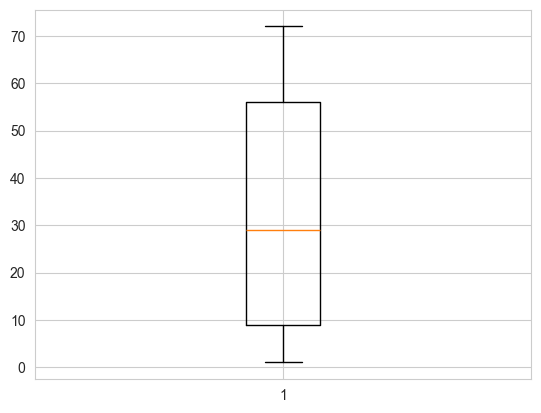

MonthlyCharges


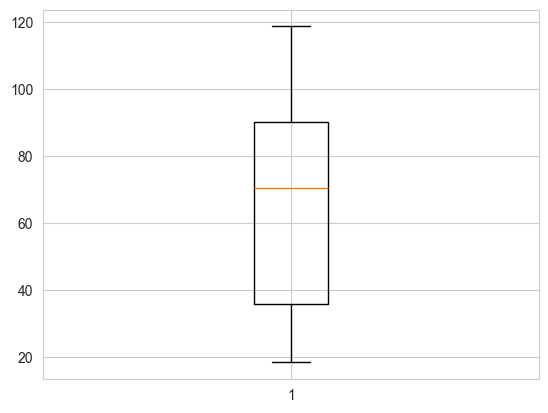

TotalCharges


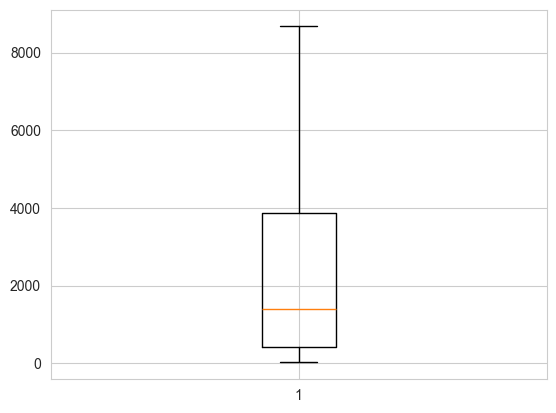

In [44]:
# Check for outliers in the numerical variables
# Use boxplot

for col in ['tenure','MonthlyCharges','TotalCharges']:
    print(col)
    plt.boxplot(Data_All[col])
    plt.show()

- **No outliers** in out Test Dataset numeric columns

We will perfom normality test on the three numeric variables to look for signs of skewedness using the D’Agostino’s K^2 Test.

In [45]:
# D’Agostino’s K^2 Test on monthly charges

stat, p = stats.normaltest(Data_All['MonthlyCharges'])

print('Statistics=%.5f, p=%.3f' % (stat, p))

# significance level (5%) for the test
alpha = 0.05

if p > alpha:
    print('the sample is normally distributed')
else:
    print('the sample is skewed')

Statistics=7510.47646, p=0.000
the sample is skewed


In [46]:
# D’Agostino’s K^2 Test on tenure

stat, p = stats.normaltest(Data_All['tenure'])

print('Statistics=%.5f, p=%.3f' % (stat, p))

# significance level (5%) for the test
alpha = 0.05

if p > alpha:
	print('the sample is normally distributed')
else:
	print('the sample is skewed')

Statistics=53555.33858, p=0.000
the sample is skewed


In [47]:
## D’Agostino’s K^2 Test on TotalCharges
stat, p = stats.normaltest(Data_All['TotalCharges'])

print('Statistics=%.5f, p=%.3f' % (stat, p))

# significance level (5%) for the test
alpha = 0.05

if p > alpha:
	print('the sample is normally distributed')
else:
	print('the sample is skewed')

Statistics=569.05463, p=0.000
the sample is skewed


In [48]:
# reset index and save to csv

Data_All.reset_index(drop=True, inplace=True)
Data_All.to_csv('Dataset\Train_Data.csv', index=False)

In [49]:
# view Data Types

print("**Data Types**")
Data_All.dtypes.value_counts()

**Data Types**


object     17
float64     2
int64       1
Name: count, dtype: int64

## clean test data

In [50]:
data_test = pd.read_csv('Dataset\Telco-churn-second-2000.csv')

In [51]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2000 non-null   object 
 1   gender            2000 non-null   object 
 2   SeniorCitizen     2000 non-null   int64  
 3   Partner           2000 non-null   object 
 4   Dependents        2000 non-null   object 
 5   tenure            2000 non-null   int64  
 6   PhoneService      2000 non-null   object 
 7   MultipleLines     2000 non-null   object 
 8   InternetService   2000 non-null   object 
 9   OnlineSecurity    2000 non-null   object 
 10  OnlineBackup      2000 non-null   object 
 11  DeviceProtection  2000 non-null   object 
 12  TechSupport       2000 non-null   object 
 13  StreamingTV       2000 non-null   object 
 14  StreamingMovies   2000 non-null   object 
 15  Contract          2000 non-null   object 
 16  PaperlessBilling  2000 non-null   object 


In [52]:
# change Dtype of TotalCharges column from object to numeric

data_test['TotalCharges'] = pd.to_numeric(data_test['TotalCharges'], errors='coerce')

In [53]:
# view Missing Values in TotalCharges column

data_test[np.isnan(data_test['TotalCharges'])]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN
826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN
1380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN


In [54]:
# Drop rows where tenure = 0

data_test.drop(labels=data_test[data_test['tenure'] == 0].index, axis=0, inplace=True)

In [55]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1997 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1997 non-null   object 
 1   gender            1997 non-null   object 
 2   SeniorCitizen     1997 non-null   int64  
 3   Partner           1997 non-null   object 
 4   Dependents        1997 non-null   object 
 5   tenure            1997 non-null   int64  
 6   PhoneService      1997 non-null   object 
 7   MultipleLines     1997 non-null   object 
 8   InternetService   1997 non-null   object 
 9   OnlineSecurity    1997 non-null   object 
 10  OnlineBackup      1997 non-null   object 
 11  DeviceProtection  1997 non-null   object 
 12  TechSupport       1997 non-null   object 
 13  StreamingTV       1997 non-null   object 
 14  StreamingMovies   1997 non-null   object 
 15  Contract          1997 non-null   object 
 16  PaperlessBilling  1997 non-null   object 
 17  

In [56]:
# Reset index

data_test.reset_index(drop=True, inplace=True)

In [57]:
# check for null values

data_test.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [58]:
# check dtype of SeniorCitizen column

data_test['SeniorCitizen'].dtypes

dtype('int64')

In [59]:
# change dtype to object

data_test['SeniorCitizen'] = data_test['SeniorCitizen'].astype('object')

In [60]:
# save test data to csv

data_test.to_csv('Dataset\Test_Data.csv', index=False)

## Hypothesis Testing

**Null Hypothesis (H0)**:
"There is no significant relationship between customer tenure and churn rate in the telecom company."

**Alternative Hypothesis (Ha)**:
"There is a significant relationship between customer tenure and churn rate in the telecom company."

We want to find the correlation between tenure and churn rates. Since churn rate is a binary outcome, we want to use a **point-biserial** correlation coefficient and assess its significance using a correlation test.

In [61]:
# 'Churn' should be a binary variable (0 for no churn, 1 for churn)

df_hypo = Data_All.copy()
df_hypo['Churn'] = df_hypo['Churn'].replace({'No': 0, 'Yes': 1})

# Calculate point-biserial correlation coefficient
correlation_coefficient, p_value = stats.pointbiserialr(df_hypo['Churn'], df_hypo['tenure'])

# Print the results
print(f"Point-Biserial Correlation Coefficient: {correlation_coefficient:.4f}")
print(f"P-value: {p_value:.4f}")

# Set the significance level (5%)
alpha = 0.05

# Determine if the correlation is statistically significant
if p_value < alpha:
    print("There is a significant correlation between customer tenure and churn rate.")
else:
    print("There is no significant correlation between customer tenure and churn rate.")


Point-Biserial Correlation Coefficient: -0.3526
P-value: 0.0000
There is a significant correlation between customer tenure and churn rate.


- The correlation coefficient of -0.3526 suggests a **moderate negative correlation**. This means that as customer tenure increases, the churn rate tends to decrease. Customers who have been with the company for a longer period are less likely to churn.

- The p-value of 0.0000 suggests that there is a strong statistical evidence to **reject the null hypothesis** (no correlation) in favor of the alternative hypothesis (significant correlation).

## Univariate Analysis
Here is the section to explore, analyze, visualize each variable independently of the others.

###  What is the Distibution of Churn Rate

In [62]:
churn_data = Data_All['Churn'].value_counts()
churn_data

Churn
No     3698
Yes    1336
Name: count, dtype: int64

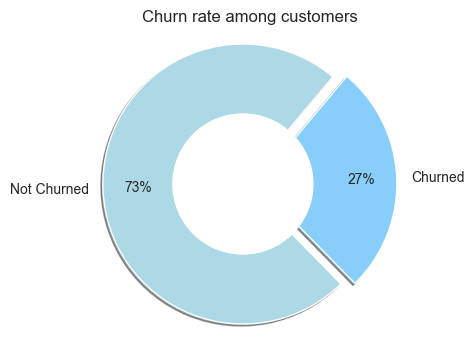

In [63]:
# Create a pie chart using pyplot to visulaize churn rate

plt.figure(figsize=(4, 4))

plt.pie(churn_data, labels=['Not Churned','Churned'], colors=['LightBlue','LightSkyBlue'], startangle=50, shadow=True, radius=2,
     explode=(0,0.2),autopct='%1.0f%%', pctdistance=0.75 ,  )
Circle=plt.Circle((0,0), 1, color='white')
c= plt.gcf()

c.gca().add_artist(Circle)
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is drawn as a circle.
plt.title('Churn rate among customers')
plt.show()


- The target variable is **imbalanced**

- The percentage of customers that did not churn (most majority class) can be used as a baseline to evaluate the quality of the models generated. These models should outperform the baseline capabilities to be considered for future predictions.

## Bivariate & Multivariate Analysis
Here is the section to explore, analyze, visualize each variable in relation to the others.

Let's look at the relationship between Churn and Gender

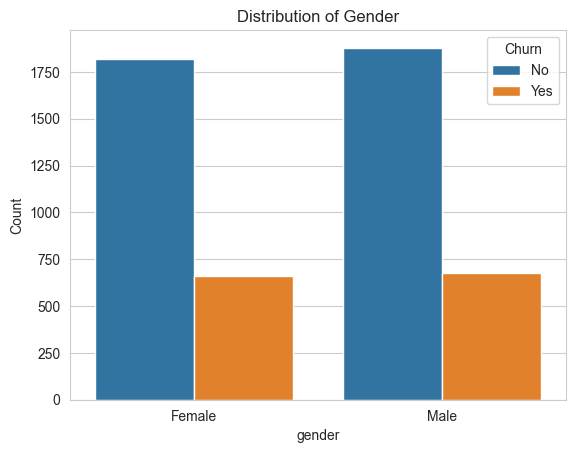

In [64]:
sns.countplot(x='gender',data=Data_All,hue='Churn')
plt.title('Distribution of Gender')
plt.xlabel('gender')
plt.ylabel('Count')
plt.show()

- The customer gender split is about 50/50 between males and females. no significant difference between gender and churn rate

##### 1. How does customer tenure relate to churn rates? Are long-tenured customers more likely to stay with the company, and do new customers exhibit higher churn behavior?

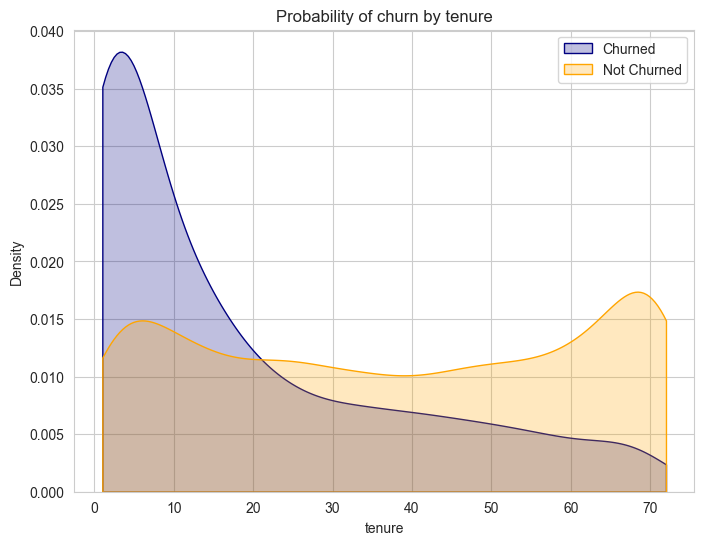

In [65]:
# We use a probability density distribution to show distribution of churn related to tenure

def kdeplot(x):
    plt.figure(figsize=(8,6))
    plt.title('Probability of churn by tenure')
    ax0= sns.kdeplot(Data_All[Data_All['Churn'] == 'Yes'][x], color='navy', label='Churn:Yes', fill =True, cut=0)
    ax1= sns.kdeplot(Data_All[Data_All['Churn'] == 'No'][x], color='orange', label='Churn:No', fill=True, cut=0)
    plt.legend(['Churned', 'Not Churned'], loc='upper right')
kdeplot('tenure')

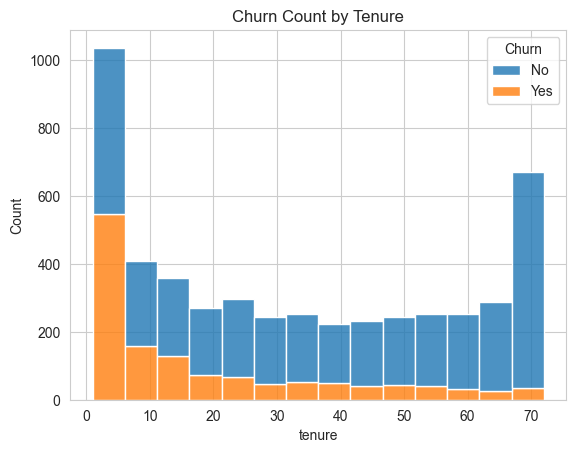

In [66]:
sns.histplot(x='tenure', hue='Churn', data=Data_All, bins=14, alpha=0.8, multiple='stack')
plt.title('Churn Count by Tenure')
plt.show()

- Customers with a lower tenure (recent customers) are more likely to churn.
- Customers on a longer tenure are less likely to churn.

##### 2. Is there a correlation between the total charges and churn rates? Do customers with higher total charges exhibit different churn behavior compared to those with lower total charges

Correlation coefficient: -0.19462794572064998
P-value: 3.6678433707849766e-44


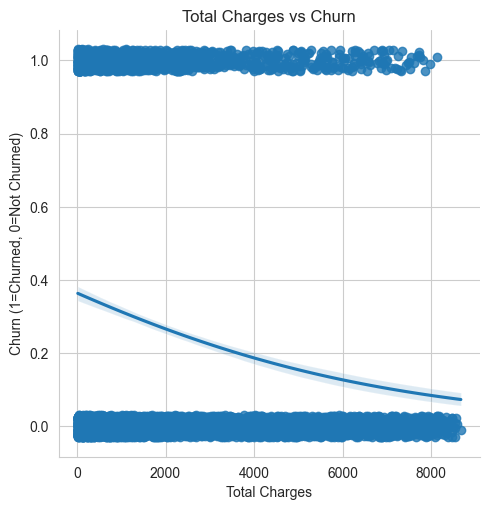

In [67]:
df_temp = df_hypo

# Convert "TotalCharges" column to numeric type and then to integers
df_temp["TotalCharges"] = pd.to_numeric(df_temp["TotalCharges"], errors="coerce", downcast="integer")

# Calculate the point-biserial correlation between TotalCharges and Churn
corr, p_value = pointbiserialr(df_temp["TotalCharges"], df_temp["Churn"])

# Print the correlation coefficient and p-value
print("Correlation coefficient:", corr)
print("P-value:", p_value)

# Plot the data points and visualize the relationship between TotalCharges and Churn
# logistic regression for binary dependent variable (Churn)

sns.lmplot(data=df_temp, x="TotalCharges", y="Churn", logistic=True, y_jitter=.03)
plt.xlabel("Total Charges")
plt.ylabel("Churn (1=Churned, 0=Not Churned)")
plt.title("Total Charges vs Churn")
plt.show()

The analysis shows a **weak negative correlation** between total charges and churn rates. As total charges increase, the likelihood of churn slightly decreases. The relationship is statistically significant (P-value < 0.05), but the effect is not very strong. Other factors may have a more significant impact on churn behavior.

##### 3. What is the impact of contract type on churn rates? Do customers on long-term contracts have significantly lower churn rates compared to those on short-term contracts?



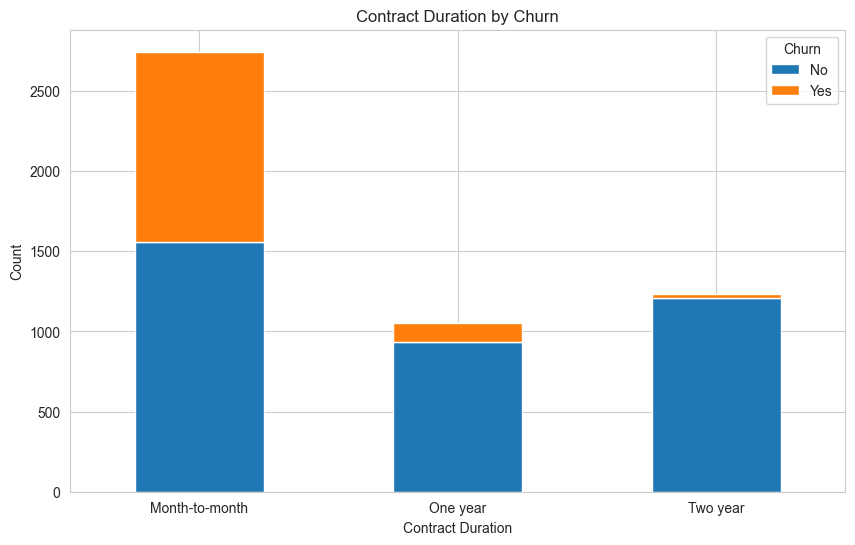

In [68]:
# Create a cross-tabulation (crosstab) of the categorical column and 'Churn' column
cross_tab = pd.crosstab(Data_All['Contract'], Data_All['Churn'])

# Plot the stacked bar plot using Seaborn

ax = cross_tab.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Contract Duration by Churn")
plt.xlabel("Contract Duration")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.legend(title="Churn", loc="upper right")
plt.show()


- Customers with short term (month-to-month) contracts have higher churn rates than customers with long term (one year+ contracts) 
- Possible reasons could include price sensitivity, competition, ineffective onboarding, and changing needs. To reduce short-term churn, focus on personalized experiences, competitive pricing, and improving onboarding processes. Building strong customer relationships and demonstrating long-term value can encourage customer loyalty.

##### 4. Are there significant differences in churn behavior between customers who have device protection and those who don't?

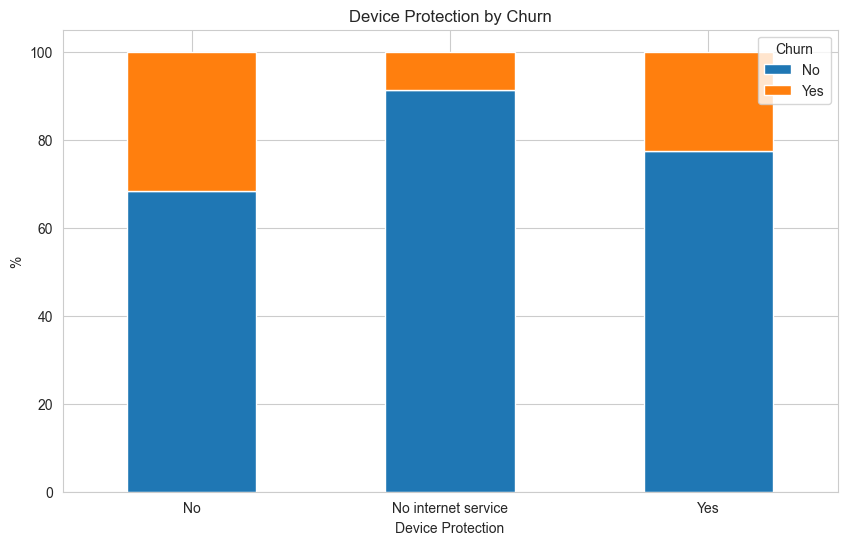

In [69]:
# Create a cross-tabulation (crosstab) of the categorical column and 'Churn' column
cross_tab = pd.crosstab(Data_All['DeviceProtection'], Data_All['Churn'])

# Plot the stacked bar plot using Seaborn
percentages = cross_tab.div(cross_tab.sum(1), axis=0) * 100

# Plot the stacked bar plot using Seaborn
ax = percentages.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Device Protection by Churn")
plt.xlabel("Device Protection")
plt.xticks(rotation=0)
plt.ylabel("%")
plt.legend(title="Churn", loc="upper right")


plt.show()

- Customers without device protection are slightly more likelt to churn, although not significantly enough

##### 5. What is the relationship between the availability of tech support and churn rates? Are customers with access to tech support more likely to remain with the company?

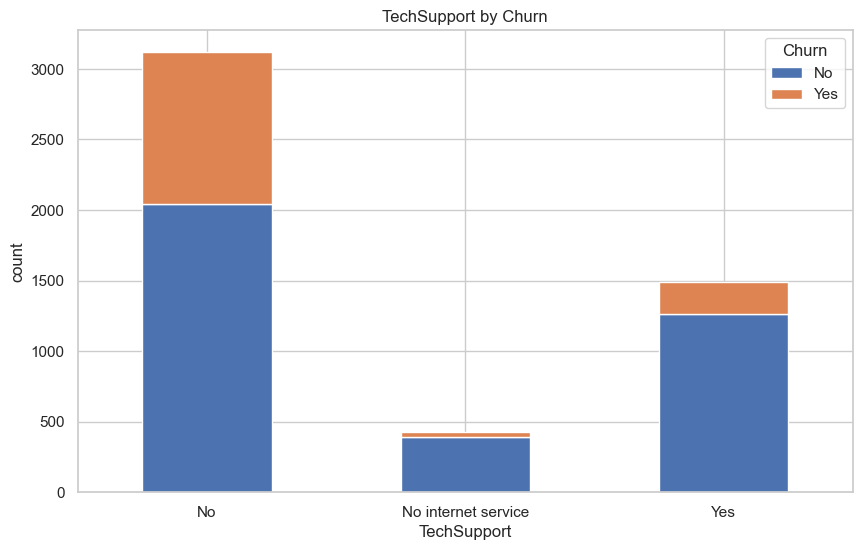

In [70]:
# Create a cross-tabulation (crosstab) of the categorical column and 'Churn' column
cross_tab = pd.crosstab(Data_All['TechSupport'], Data_All['Churn'])

# Plot the stacked bar plot using Seaborn
sns.set(style="whitegrid")
ax = cross_tab.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("TechSupport by Churn")
plt.xlabel("TechSupport")
plt.xticks(rotation=0)
plt.ylabel("count")
plt.legend(title="Churn", loc="upper right")


plt.show()

- Customers with no tech support were more likely to churn

6. Do streaming services play a role in customer churn? Are customers with streaming services, such as StreamingTV and StreamingMovies, more likely to stay with the company?

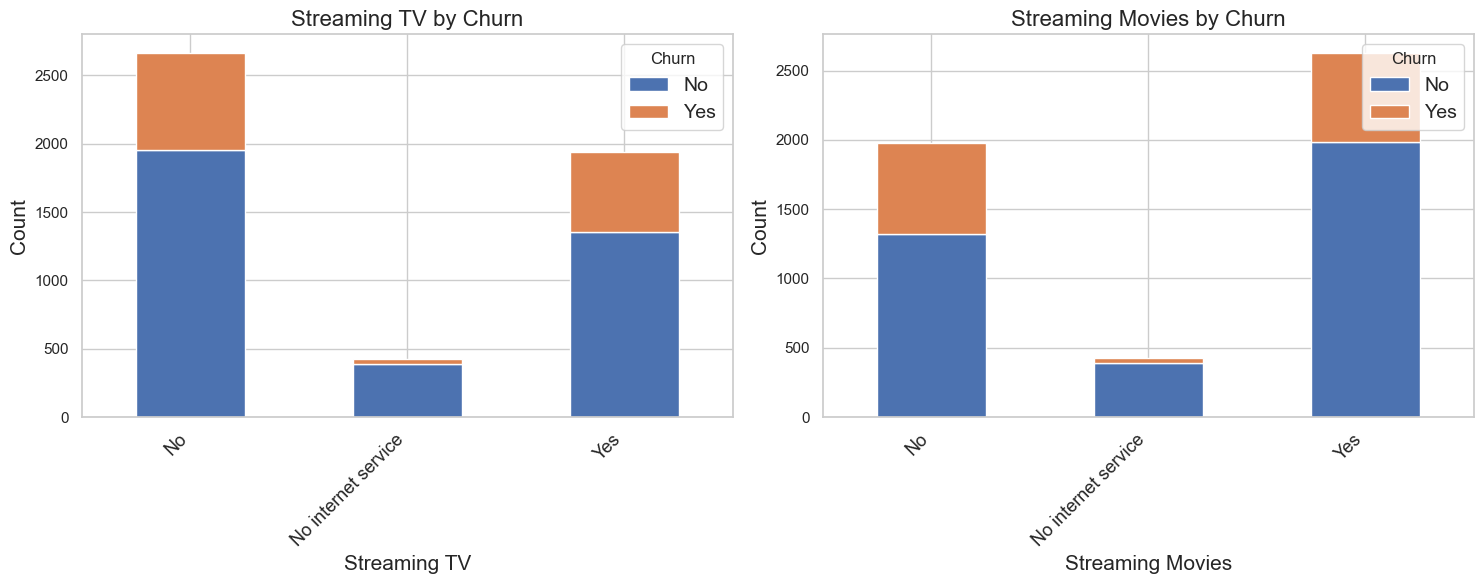

In [71]:
# Create a cross-tabulation (crosstab) of the two categorical columns and 'Churn' column
cross_tab1 = pd.crosstab(Data_All['StreamingTV'], Data_All['Churn'])
cross_tab2 = pd.crosstab(Data_All['StreamingMovies'], Data_All['Churn'])

# Set up the subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot the first stacked bar chart
cross_tab1.plot(kind="bar", stacked=True, ax=axes[0])
axes[0].set_title("Streaming TV by Churn", fontsize=16)
axes[0].set_xlabel("Streaming TV", fontsize=15)
axes[0].set_ylabel("Count", fontsize=15)
axes[0].legend(title="Churn", loc="upper right", fontsize=14)

axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right', fontsize=13)
# Plot the second stacked bar chart
cross_tab2.plot(kind="bar", stacked=True, ax=axes[1])
axes[1].set_title("Streaming Movies by Churn", fontsize=16)
axes[1].set_xlabel("Streaming Movies",fontsize=15)
axes[1].set_ylabel("Count", fontsize=15)
axes[1].legend(title="Churn", loc="upper right", fontsize=14)

axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right', fontsize=13)
# Adjust layout and display
plt.tight_layout()
plt.show()

- No significant relationship between streaming services and churn rates

7. How does the choice of payment method impact churn rates? Are customers with specific payment methods more prone to churn than others?

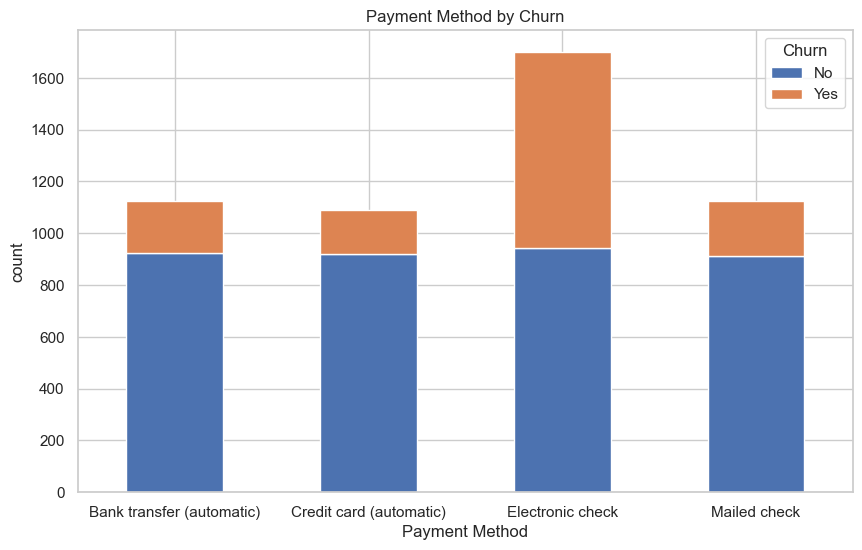

In [72]:
# Create a cross-tabulation (crosstab) of the categorical column and 'Churn' column
cross_tab = pd.crosstab(Data_All['PaymentMethod'], Data_All['Churn'])

# Plot the stacked bar plot using Seaborn
sns.set(style="whitegrid")
ax = cross_tab.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Payment Method by Churn")
plt.xlabel("Payment Method")
plt.xticks(rotation=0)
plt.ylabel("count")
plt.legend(title="Churn", loc="upper right")


plt.show()

- Customers who pay by electronic check were more likely to churn.

Lets look at correlation between numeric values and target variable (Churn)

In [73]:
numeric_columns = df_hypo.select_dtypes(include=['int64', 'float64'])
numeric_columns.corr()

,tenure,MonthlyCharges,TotalCharges,Churn
tenure,1.000000,0.239642,0.826188,-0.352634
MonthlyCharges,0.239642,1.000000,0.646813,0.201995
TotalCharges,0.826188,0.646813,1.000000,-0.194628
Churn,-0.352634,0.201995,-0.194628,1.000000


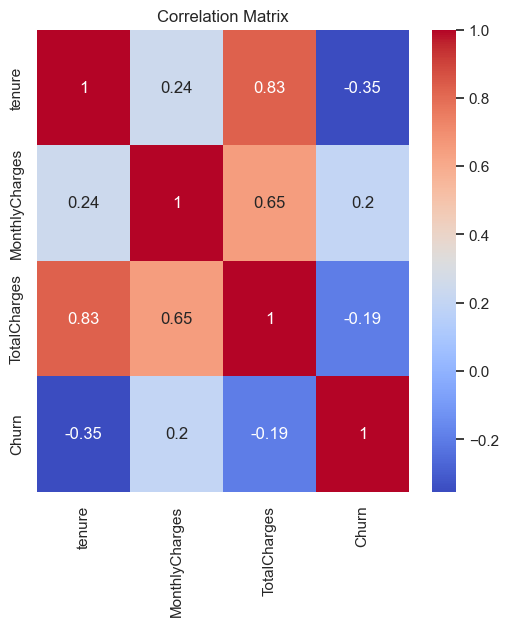

In [74]:
plt.figure(figsize=(6,6))
sns.heatmap(numeric_columns.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

1. **tenure vs. Churn**: The negative correlation coefficient (-0.352634) indicates a moderate negative linear relationship between the two variables. As 'tenure' (the duration a customer has been with the company) increases, the 'Churn' rate (the likelihood of a customer churning) tends to decrease.

2. **MonthlyCharges vs. Churn**: The positive correlation coefficient (0.201995) indicates a weak positive linear relationship between the two variables. As 'MonthlyCharges' increase, the 'Churn' rate tends to slightly increase. However, the correlation is not as strong as with 'tenure'.

3. **TotalCharges vs. Churn**: The negative correlation (-0.194628) suggests a weak negative linear relationship between the two variables. As 'TotalCharges' (the total amount charged to the customer) increases, the 'Churn' rate tends to slightly decrease. However, similar to 'MonthlyCharges', the correlation is not as strong as with 'tenure'.

## Feature Processing & Engineering
Here is the section to **clean**, **process** the dataset and **create new features**.

In [75]:
Data_All.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5034 entries, 0 to 5033
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5034 non-null   object 
 1   SeniorCitizen     5034 non-null   object 
 2   Partner           5034 non-null   object 
 3   Dependents        5034 non-null   object 
 4   tenure            5034 non-null   int64  
 5   PhoneService      5034 non-null   object 
 6   MultipleLines     5034 non-null   object 
 7   InternetService   5034 non-null   object 
 8   OnlineSecurity    5034 non-null   object 
 9   OnlineBackup      5034 non-null   object 
 10  DeviceProtection  5034 non-null   object 
 11  TechSupport       5034 non-null   object 
 12  StreamingTV       5034 non-null   object 
 13  StreamingMovies   5034 non-null   object 
 14  Contract          5034 non-null   object 
 15  PaperlessBilling  5034 non-null   object 
 16  PaymentMethod     5034 non-null   object 


In [76]:
Data_All.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes


In [77]:
# check unique values of each column
for column in Data_All.columns:
    print('Column: {} - Unique Values: {}'.format(column, Data_All[column].unique()))

Column: gender - Unique Values: ['Female' 'Male']
Column: SeniorCitizen - Unique Values: [0 1]
Column: Partner - Unique Values: ['Yes' 'No']
Column: Dependents - Unique Values: ['No' 'Yes']
Column: tenure - Unique Values: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
Column: PhoneService - Unique Values: ['No' 'Yes']
Column: MultipleLines - Unique Values: ['No' 'Yes' 'No phone service']
Column: InternetService - Unique Values: ['DSL' 'Fiber optic' 'No']
Column: OnlineSecurity - Unique Values: ['No' 'Yes' 'No internet service']
Column: OnlineBackup - Unique Values: ['Yes' 'No' 'No internet service']
Column: DeviceProtection - Unique Values: ['No' 'Yes' 'No internet service']
Column: TechSupport - Unique Values: ['No' 'Yes' 'No internet service']
Column: StreamingTV - Unique Values: ['No' 'Yes' 'No internet service']

#### Mutual Information (MI) scores

We calculate the mutual scores between categorical features and the target variable (Churn) in the test dataset. Mutual Information is a measure of the dependence between two variables, which quantifies how much knowing the value of one variable reduces uncertainty about the other variable.

This helps identify which categorical features are more informative in relation to the target variable, making them potentially valuable for predicting or understanding the 'Churn' behavior.

In [78]:
# Lets find out feature dependency on the target variable using mutual information score

x_cat = Data_All.select_dtypes(include=object).drop('Churn', axis=1)
y_cat = Data_All['Churn']

mi_scores = []

#  loop to calculate the Mutual Information Score for each categorical feature 
#  with respect to the 'Churn' target variable

for column in x_cat.columns:
    mi_score = mutual_info_score(x_cat[column], y_cat)
    mi_scores.append((column, mi_score))

# sort features by their importance dependency on the target variable, 
# with the most important ones at the top.

mi_scores.sort(key=lambda x: x[1], reverse=True)

for feature, score in mi_scores:
    print(f"Feature: {feature}, Mutual Information Score: {score}")

Feature: Contract, Mutual Information Score: 0.10284790516675524
Feature: InternetService, Mutual Information Score: 0.05944428811167132
Feature: PaymentMethod, Mutual Information Score: 0.04163984913943765
Feature: TechSupport, Mutual Information Score: 0.030007109249305178
Feature: OnlineSecurity, Mutual Information Score: 0.029670157336360276
Feature: PaperlessBilling, Mutual Information Score: 0.019508874345666505
Feature: OnlineBackup, Mutual Information Score: 0.015826778687180174
Feature: Dependents, Mutual Information Score: 0.015615368107435551
Feature: DeviceProtection, Mutual Information Score: 0.013717699147021103
Feature: StreamingMovies, Mutual Information Score: 0.013349078621584257
Feature: SeniorCitizen, Mutual Information Score: 0.010389723457655958
Feature: Partner, Mutual Information Score: 0.010018147440621322
Feature: StreamingTV, Mutual Information Score: 0.009953736504141789
Feature: MultipleLines, Mutual Information Score: 0.0008281912846177519
Feature: PhoneSe

In [79]:
features = [score[0] for score in mi_scores]
scores = [score[1] for score in mi_scores]

# Create a bar plot using Plotly
fig = px.bar(x=scores, y=features, orientation='h', color=scores,
             labels={'x': 'Mutual Information Score', 'y': 'Features'},
             title='Categorical Features Relationship with Target (Churn)',
             template='plotly',
             color_continuous_scale=px.colors.sequential.Plasma)

fig.show()

- The gender, Phoneservice and Multiplelines have a very low mutual score (close to 0). This suggests that they have little to no predictive power or relationship with the target variable. 
- Contract and Internet Service have the highest mutual scores. Different contract lengths and the type of internet service a customer has may be associated with different churn rates.

In [80]:
file_path = 'Screenshots\Mutual_information_plot.png'

# save the figure as a PNG image

pio.write_image(fig, file_path)

In [81]:
# drop columns

Data_All.drop(columns=['gender','PhoneService', 'MultipleLines'], inplace=True)

In [82]:
# Create bins for Tenure column
# We do this to reduce data complexity and potentialy increase our model performance

def tenure (T):
    if T<=12:
        return 1
    elif T>12 and T<=24:
        return 2
    elif T>24 and T<=36:
        return 3
    elif T>36 and T<=48:
        return 4
    elif T>48 and T<=60:
        return 5
    else:
        return 6

Data_All['Tenure_group']=Data_All['tenure'].apply(lambda x: tenure(x))

In [83]:
Data_All['Tenure_group'].value_counts()

Tenure_group
1    1534
6    1016
2     732
3     603
5     590
4     559
Name: count, dtype: int64

In [84]:
# drop original tenure column

Data_All.drop('tenure', axis = 1, inplace=True)

<Axes: xlabel='Tenure_group', ylabel='count'>

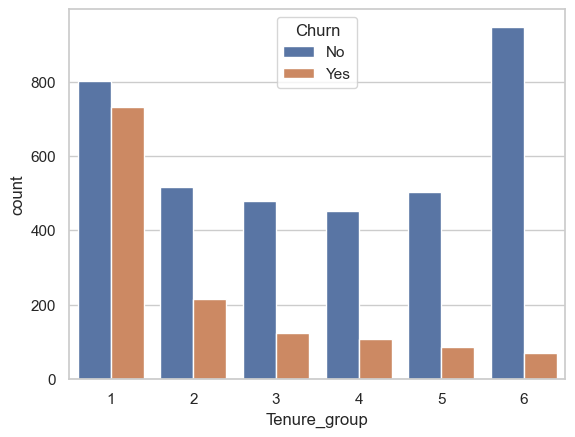

In [85]:
sns.countplot(x='Tenure_group', hue='Churn', data=Data_All)

In [86]:
df_encode = Data_All.copy()
df_encode.head()

,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure_group
0,0,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No,1
1,0,No,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,No,3
2,0,No,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes,1
3,0,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000,No,4
4,0,No,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes,1


### Dataset Splitting

In [87]:
X = df_encode.drop(columns=['Churn'])
y = df_encode['Churn']

### Label Encoding

In [88]:
# Encode the target variable (Churn) to have 0 or 1 instead of No or Yes

labelEncoder = LabelEncoder()

y = labelEncoder.fit_transform(y)

In [89]:
(X.shape, y.shape)

((5034, 16), (5034,))

In [90]:
# view Data Types

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5034 entries, 0 to 5033
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     5034 non-null   object 
 1   Partner           5034 non-null   object 
 2   Dependents        5034 non-null   object 
 3   InternetService   5034 non-null   object 
 4   OnlineSecurity    5034 non-null   object 
 5   OnlineBackup      5034 non-null   object 
 6   DeviceProtection  5034 non-null   object 
 7   TechSupport       5034 non-null   object 
 8   StreamingTV       5034 non-null   object 
 9   StreamingMovies   5034 non-null   object 
 10  Contract          5034 non-null   object 
 11  PaperlessBilling  5034 non-null   object 
 12  PaymentMethod     5034 non-null   object 
 13  MonthlyCharges    5034 non-null   float64
 14  TotalCharges      5034 non-null   float64
 15  Tenure_group      5034 non-null   int64  
dtypes: float64(2), int64(1), object(13)
memory

### Features encoding

In [91]:
# One hot encoding for categorical columns

categorical_columns = ['SeniorCitizen', 'Partner', 'Dependents',
                       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 
                       'PaperlessBilling', 'PaymentMethod', 'Tenure_group']

# Create column transformer instance

transformer = make_column_transformer(
    (OneHotEncoder(sparse=False), categorical_columns)
)

In [92]:
transformed_data = transformer.fit_transform(X[categorical_columns])

In [93]:
# Transformating back to a dataframe
transformed_df = pd.DataFrame(transformed_data, columns=transformer.get_feature_names_out())

# One-hot encoding removed an index. Let's put it back
transformed_df.index = X.index

# Joining tables
X = pd.concat([X, transformed_df], axis=1)

# Dropping old categorical columns
X.drop(categorical_columns, axis=1, inplace=True)

X.head()

,MonthlyCharges,TotalCharges,onehotencoder__SeniorCitizen_0,onehotencoder__SeniorCitizen_1,onehotencoder__Partner_No,onehotencoder__Partner_Yes,onehotencoder__Dependents_No,onehotencoder__Dependents_Yes,onehotencoder__InternetService_DSL,onehotencoder__InternetService_Fiber optic,onehotencoder__InternetService_No,onehotencoder__OnlineSecurity_No,onehotencoder__OnlineSecurity_No internet service,onehotencoder__OnlineSecurity_Yes,onehotencoder__OnlineBackup_No,onehotencoder__OnlineBackup_No internet service,onehotencoder__OnlineBackup_Yes,onehotencoder__DeviceProtection_No,onehotencoder__DeviceProtection_No internet service,onehotencoder__DeviceProtection_Yes,onehotencoder__TechSupport_No,onehotencoder__TechSupport_No internet service,onehotencoder__TechSupport_Yes,onehotencoder__StreamingTV_No,onehotencoder__StreamingTV_No internet service,onehotencoder__StreamingTV_Yes,onehotencoder__StreamingMovies_No,onehotencoder__StreamingMovies_No internet service,onehotencoder__StreamingMovies_Yes,onehotencoder__Contract_Month-to-month,onehotencoder__Contract_One year,onehotencoder__Contract_Two year,onehotencoder__PaperlessBilling_No,onehotencoder__PaperlessBilling_Yes,onehotencoder__PaymentMethod_Bank transfer (automatic),onehotencoder__PaymentMethod_Credit card (automatic),onehotencoder__PaymentMethod_Electronic check,onehotencoder__PaymentMethod_Mailed check,onehotencoder__Tenure_group_1,onehotencoder__Tenure_group_2,onehotencoder__Tenure_group_3,onehotencoder__Tenure_group_4,onehotencoder__Tenure_group_5,onehotencoder__Tenure_group_6
0,29.850000,29.850000,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,56.950001,1889.500000,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,53.849998,108.150002,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,42.299999,1840.750000,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,70.699997,151.649994,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [94]:
print(X.columns)

Index(['MonthlyCharges', 'TotalCharges', 'onehotencoder__SeniorCitizen_0',
       'onehotencoder__SeniorCitizen_1', 'onehotencoder__Partner_No',
       'onehotencoder__Partner_Yes', 'onehotencoder__Dependents_No',
       'onehotencoder__Dependents_Yes', 'onehotencoder__InternetService_DSL',
       'onehotencoder__InternetService_Fiber optic',
       'onehotencoder__InternetService_No', 'onehotencoder__OnlineSecurity_No',
       'onehotencoder__OnlineSecurity_No internet service',
       'onehotencoder__OnlineSecurity_Yes', 'onehotencoder__OnlineBackup_No',
       'onehotencoder__OnlineBackup_No internet service',
       'onehotencoder__OnlineBackup_Yes', 'onehotencoder__DeviceProtection_No',
       'onehotencoder__DeviceProtection_No internet service',
       'onehotencoder__DeviceProtection_Yes', 'onehotencoder__TechSupport_No',
       'onehotencoder__TechSupport_No internet service',
       'onehotencoder__TechSupport_Yes', 'onehotencoder__StreamingTV_No',
       'onehotencoder__Stre

In [95]:
# Renaming columns

X.columns = ['MonthlyCharges', 'TotalCharges',
             'SeniorCitizen_0','SeniorCitizen_1',
             'Partner_No','Partner_Yes',
             'Dependents_No','Dependents_Yes',
             'InternetService_DSL','InternetService_Fiber','InternetService_No',
             'OnlineSecurity_No','OnlineSecurity_NoInternetService','OnlineSecurity_Yes',
             'OnlineBackup_No','OnlineBackup_NoInternetService','OnlineBackup_Yes',
             'DeviceProtection_No','DeviceProtection_NoInternetService','DeviceProtection_Yes',
             'TechSupport_No', 'TechSupport_NoInternetService','TechSupport_Yes',
             'StreamingTV_No', 'StreamingTV_NoInternetService','StreamingTV_Yes',
             'StreamingMovies_No','StreamingMovies_NoInternetService','StreamingMovies_Yes',
             'Contract_Month-to-month','Contract_One year', 'Contract_Two year',
             'PaperlessBilling_No','PaperlessBilling_Yes',
             'PaymentMethod_BankTransfer','PaymentMethod_CreditCard','PaymentMethod_ElectronicCheck','PaymentMethod_MailedCheck',
             'Tenure_group_1', 'Tenure_group_2', 'Tenure_group_3', 'Tenure_group_4', 'Tenure_group_5', 'Tenure_group_6']

In [96]:
X.head()

,MonthlyCharges,TotalCharges,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,InternetService_DSL,InternetService_Fiber,InternetService_No,OnlineSecurity_No,OnlineSecurity_NoInternetService,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_NoInternetService,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_NoInternetService,DeviceProtection_Yes,TechSupport_No,TechSupport_NoInternetService,TechSupport_Yes,StreamingTV_No,StreamingTV_NoInternetService,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_NoInternetService,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_BankTransfer,PaymentMethod_CreditCard,PaymentMethod_ElectronicCheck,PaymentMethod_MailedCheck,Tenure_group_1,Tenure_group_2,Tenure_group_3,Tenure_group_4,Tenure_group_5,Tenure_group_6
0,29.850000,29.850000,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,56.950001,1889.500000,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,53.849998,108.150002,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,42.299999,1840.750000,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,70.699997,151.649994,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [97]:
# check for missing values

X.isnull().sum()

MonthlyCharges                        0
TotalCharges                          0
SeniorCitizen_0                       0
SeniorCitizen_1                       0
Partner_No                            0
Partner_Yes                           0
Dependents_No                         0
Dependents_Yes                        0
InternetService_DSL                   0
InternetService_Fiber                 0
InternetService_No                    0
OnlineSecurity_No                     0
OnlineSecurity_NoInternetService      0
OnlineSecurity_Yes                    0
OnlineBackup_No                       0
OnlineBackup_NoInternetService        0
OnlineBackup_Yes                      0
DeviceProtection_No                   0
DeviceProtection_NoInternetService    0
DeviceProtection_Yes                  0
TechSupport_No                        0
TechSupport_NoInternetService         0
TechSupport_Yes                       0
StreamingTV_No                        0
StreamingTV_NoInternetService         0


### Features Scaling

In [98]:
# standardization for numeric values

cols = ['MonthlyCharges', 'TotalCharges']

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X[cols])

In [99]:
# Create new DataFrames with the scaled values
X_scaled_df = pd.DataFrame(X_scaled, columns=cols, index=X.index)

# Drop the original unscaled columns
X.drop(cols, axis=1, inplace=True)

# Concatenate the scaled columns with the original DataFrames
X = pd.concat([X, X_scaled_df], axis=1)

In [100]:
X.head()

,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,InternetService_DSL,InternetService_Fiber,InternetService_No,OnlineSecurity_No,OnlineSecurity_NoInternetService,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_NoInternetService,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_NoInternetService,DeviceProtection_Yes,TechSupport_No,TechSupport_NoInternetService,TechSupport_Yes,StreamingTV_No,StreamingTV_NoInternetService,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_NoInternetService,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_BankTransfer,PaymentMethod_CreditCard,PaymentMethod_ElectronicCheck,PaymentMethod_MailedCheck,Tenure_group_1,Tenure_group_2,Tenure_group_3,Tenure_group_4,Tenure_group_5,Tenure_group_6,MonthlyCharges,TotalCharges
0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.172700,-1.001315
1,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.271320,-0.181408
2,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.374430,-0.966794
3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.758597,-0.202901
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.186022,-0.947615


## Train set Balancing (SMOTE Algorithm)

SMOTE (Synthetic Minority Over-sampling Technique) is a method used to address class imbalance in a binary classification problem. 

Earlier we realised that our target vaiable has a class imbalance. One class (the minority class) has significantly fewer instances than the other class (the majority class). This imbalance can negatively impact the performance of machine learning models, as they might become biased toward the majority class.

SMOTE will aim to balance the class distribution by generating synthetic samples until the minority class has the same number of instances as the majority class. By creating synthetic samples, SMOTE helps the model better capture the patterns in the minority class and prevents it from favoring the majority class due to the imbalance. 

In [101]:
# apply SMOTE to the training data (oversampling)

smote = SMOTE(random_state=42, k_neighbors=5, sampling_strategy='auto')

X_resampled, y_resampled = smote.fit_resample(X, y)

#### Train-test split

In [102]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

In [103]:
# check shape after resampling

pd.DataFrame(X_train).shape, pd.DataFrame(y_train).shape

((5916, 44), (5916, 1))

In [104]:
# view class distribution

pd.value_counts(pd.Series(y_train))

0    2958
1    2958
Name: count, dtype: int64

Our train dataset is now balaced

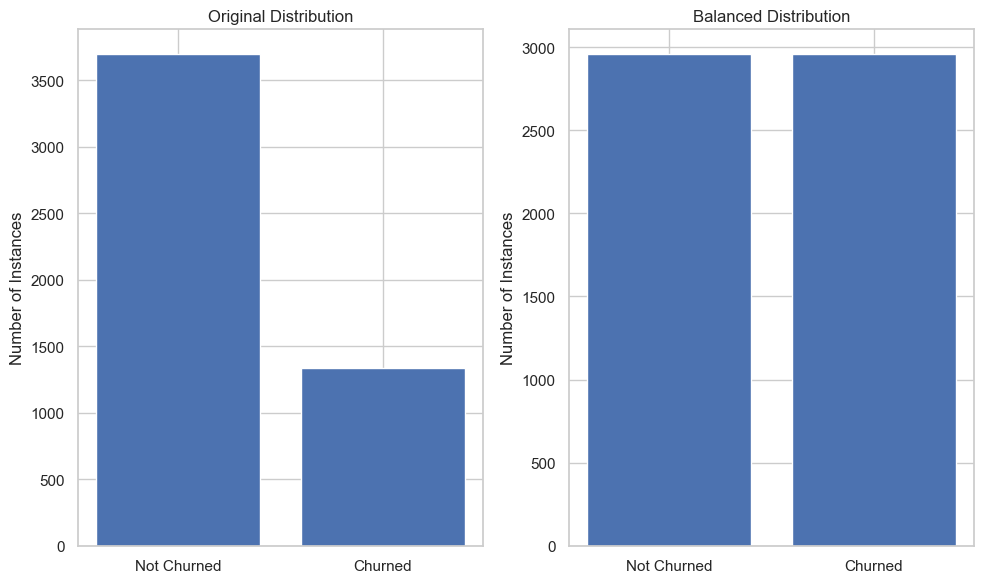

In [105]:
# create subplots to compare unbalanced and balanced data

fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# Plot the first bar graph for the original distribution
unique, counts = np.unique(y, return_counts=True)
axes[0].bar(unique, counts)
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Not Churned', 'Churned'])
axes[0].set_ylabel('Number of Instances')
axes[0].set_title('Original Distribution')

# Plot the second bar graph for a separate y value
unique2, counts2 = np.unique(y_train, return_counts=True) 
axes[1].bar(unique2, counts2)
axes[1].set_xticks([0, 1])  # Adjust as needed
axes[1].set_xticklabels(['Not Churned', 'Churned'])  # Adjust labels
axes[1].set_ylabel('Number of Instances')
axes[1].set_title('Balanced Distribution')

# Adjust spacing between subplots
plt.tight_layout()

# Display the subplots
plt.show()

# 4. Modeling 
Here is the section to **build**, **train**, **evaluate** and **compare** the models to each others.

## Model 1. Logistic Regression Model

In [106]:
LR = LogisticRegression(random_state=42)

# Train the model
LR.fit(X_train, y_train)

LogisticRegression(random_state=42)

## Model 2. K-nearest Neighbors

In [107]:
knn = KNeighborsClassifier()


knn.fit(X_train, y_train)

KNeighborsClassifier()

## Model 3. Random Forest Classifier

In [108]:
rfm = RandomForestClassifier(random_state=42)

# Train the model
rfm.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Model 4. Support Vector Machines

In [109]:
svm = SVC(random_state=42)

# Train the model
svm.fit(X_train, y_train)

SVC(random_state=42)

## Model 5. Gradient Boosting

In [110]:
gb = GradientBoostingClassifier(random_state=42)

# Train the model
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

## Model 6. XGBoost

In [111]:
xgb = XGBClassifier(random_state=42)

# Train the model
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

# 5. Model Evaluation
We create a pandas dataframe that will allow us to compare our models.

## K-Fold Cross-Validation

k-fold cross-validation  estimates the performance on our models across multiple subsets of the data (k-folds), providing a comprehensive evaluation of their generalization ability. The model is trained and evaluated k times, with each fold serving as the validation set once. This process helps estimate the model's performance across different subsets of the data.

It helps estimate how well a model will perform on new, unseen data and provides insights into its stability and consistency.

In [112]:
# Create a dataframe with the K-fold Cross-Validation results

models = [
    ('Logistic Regression', LR),
    ('Random Forest', rfm),
    ('SVM', svm),
    ('Gradient Boosting', gb),
    ('XGBoost', xgb)
]

# number of k-folds
k = 5

results = []

for name, model in models:
    kf = KFold(n_splits=k, shuffle=True, random_state=42)  # Create a KFold object
    scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')

    # Append results to the list
    results.append((name, scores.mean(), scores.std()))

results_df = pd.DataFrame(results, columns=['Model', 'Mean Accuracy', 'Std Deviation'])

results_df.sort_values(by='Mean Accuracy', ascending=False)

,Model,Mean Accuracy,Std Deviation
1,Random Forest,0.851418,0.009629
4,XGBoost,0.840940,0.007813
3,Gradient Boosting,0.839924,0.008978
2,SVM,0.812035,0.012358
0,Logistic Regression,0.776874,0.016424


The output of our k-fold cross-validation is the mean accuracy and std deviation.

1. **Average Accuracy** is the mean across all k folds during the cross-validation process. Higher mean accuracy values indicate better predictive performance.
2. **Standard Deviation** measures the variability or spread of accuracy values across the k folds. A lower standard deviation suggests that the model's performance is consistent across different subsets of the data (folds), while a higher standard deviation indicates that the model's performance varies more widely. Smaller standard deviations are generally desirable because they indicate a more stable model.

The **Random Forest** model has the highest mean accuracy (0.8507) **85%** among the evaluated models. This means that, on average, the model correctly predicted the target variable for about 85% of the data points in each fold. It performs well on average across different folds, and it has a relatively low standard deviation (0.0087), indicating consistent performance.

### Classification Report

In [113]:
model_names = ['Logistic Regression', 'k-NN', 'Random Forest', 'SVM', 'Gradient Boosting', 'XGBoost']
models = [LR, knn, rfm, svm, gb, xgb] # our trained models
model_names_list = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Loop through each model to calculate metrics and store information
for name, model in zip(model_names, models):
    # Make predictions on the test data
    y_pred = model.predict(X_test)
    
    # Calculate accuracy, precision, recall, and F1-score
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Store model name and metrics
    model_names_list.append(name)
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

# Create a DataFrame with the calculated metrics
metrics_df = pd.DataFrame({
    'Model': model_names_list,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1-Score': f1_scores
})

# Display the DataFrame
metrics_df.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy,Precision,Recall,F1-Score
2,Random Forest,0.869595,0.866131,0.874324,0.870208
5,XGBoost,0.851351,0.848525,0.855405,0.851952
4,Gradient Boosting,0.844595,0.827763,0.870270,0.848485
3,SVM,0.812162,0.784483,0.860811,0.820876
1,k-NN,0.792568,0.738174,0.906757,0.813827
0,Logistic Regression,0.770946,0.754119,0.804054,0.778286


- The random forest model is our highest performing model with an accuracy of 0.869595 / **87%**.

**Accuracy**: Accuracy is a measure of the overall correctness of predictions made by the model. It indicates the proportion of correctly classified instances out of the total number of instances.

**Precision**: Precision is a metric that measures the proportion of true positive predictions (*correctly predicted positive instances*) out of all instances predicted as positive. It assesses the model's ability to avoid false positives.

**Recall**: Recall, also known as *sensitivity* or true positive rate, measures the proportion of true positive predictions out of all actual positive instances. It assesses the model's ability to capture all positive instances.

**F1-Score**: The F1-Score is the harmonic mean of precision and recall. It provides a balanced measure that considers both false positives and false negatives. It is particularly useful when dealing with imbalanced datasets.

- Our top 3 models (Random Forest, XGBoost and Gradient Boosting) are all tree based models, specifically ensemble learning techniques that combine multiple individual trees to improve overall performance and robustness. They reduce overfitting by averaging or boosting the individual trees' predictions. They offer a combination of powerful features that make them robust, accurate, and versatile for classification tasks across a wide range of domains and data characteristics.

In [114]:
fig = px.bar(metrics_df, x='Model', y='Accuracy',color='Model',
             title='Model Performance Metrics (Accuracy)',
             labels={'Model': 'Model Name', 'Accuracy': 'Accuracy Score'}
            )

# Show the plot
fig.show()

These are the performancemetrics from our classification report that help us see how our models are performing.

1. **Accuracy**: Accuracy measures the proportion of correctly predicted instances out of the total instances in the dataset. It is an important metric for classification tasks. Our Random Forest model has the highest accuracy (0.8696). This means that around 86.96% of the predictions made by the Random Forest model were correct. Since our data is balanced, we want to use the accuracy score as our main evaluation metric.

In balanced data, there is less risk of the model being biased towards one class due to class imbalance. As a result, accuracy effectively captures the model's ability to correctly classify instances from both classes equally. When the classes are balanced, a high accuracy score indicates that the model is performing well across both classes and is making accurate predictions overall.

2. **Precision**: Precision quantifies how many of the positive predictions made by the model were actually correct. It's the ratio of true positives (correctly predicted positives) to the total number of instances predicted as positive. A higher precision indicates fewer false positives. In the Random Forest model, the precision is approximately 0.8681, meaning that about 86.81% of the positive predictions made by the model were accurate.

3. **Recall**: Recall, also known as *sensitivity* or true positive rate, measures the proportion of actual positive instances that were correctly predicted by the model. It's the ratio of true positives to the total number of actual positives. A higher recall indicates fewer false negatives. In the Random Forest model, the recall is approximately 0.8716, indicating that about 87.16% of the actual positive instances were correctly identified by the model.

4. **F1-Score**: The F1-Score is the harmonic mean of precision and recall. It combines both precision and recall into a single metric. The F1-Score gives us a balanced measure of a model's performance, considering both false positives and false negatives. In the Random Forest model, the F1-Score is approximately 0.8699, which takes into account both precision and recall.

In [115]:
file_path = 'Screenshots\Model_Performance_Accuracy.png'

# save the figure as a PNG image

pio.write_image(fig, file_path)

### Hyperparameter tuning 

We will Fine-tune our top 3 models using a ` RandomizedSearchCV`  (that is in sklearn.model_selection
) to find the best hyperparameters and achieve the maximum performance of each of the Top 3 models, then compare them again to select the best one.

#### 1. Tuning Model 1 (Random Forest)

In [116]:
# Check current model parameters

current_params = rfm.get_params()
current_params

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [117]:
# Random Forest tuning

# Define the parameter distributions for hyperparameter tuning
param_grid = {
  'n_estimators': [20, 50, 100, 200, 300],
  'max_depth': [None, 10, 15, 20, 25],
  'min_samples_split': [2, 4, 6],
  'min_samples_leaf': [1, 2, 3, 4, 5],
  'class_weight': ['balanced', None],
  'max_features': ['auto', 'sqrt', 'log2'],
  'criterion': ['gini', 'entropy']
}


# Create a RandomForestClassifier model with a specific random state
rf_model = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV with the RandomForestClassifier model and parameter distributions
random_search_rf = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid, 
                                      scoring='accuracy', n_iter=150, random_state=42,
                                      cv=5, n_jobs=-1, verbose = 2)

# fit best estimator on train data
random_search_rf.fit(X_train, y_train)

# best parameters
best_params = random_search_rf.best_params_

# mean accuracy score of the best estimator
best_score = random_search_rf.best_score_

best_params

Fitting 5 folds for each of 150 candidates, totalling 750 fits


{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20,
 'criterion': 'entropy',
 'class_weight': 'balanced'}

In [118]:
# mean accuracy score of the best estimator

best_score

0.8536178348678348

In [119]:
# Fit tuned model on train data

tuned_rf_model = random_search_rf.best_estimator_
tuned_rf_model.fit(X_train, y_train)

# original model
rf_model.fit(X_train, y_train)

# make the predictions
random_search_rf_pred = tuned_rf_model.predict(X_test)
original_rf_model = rf_model.predict(X_test)

Let's compare the tuned model and the original model performance

In [120]:
# Calculate the classification report

report = classification_report(y_test, original_rf_model, output_dict=True)
report_2 = classification_report(y_test, random_search_rf_pred, output_dict=True)

# Extract precision, recall, f1-score, and accuracy metrics for both classes

precision = ((report['1']['precision'] + report['0']['precision'])) / 2
recall = ((report['1']['recall'] + report['0']['recall'])) / 2
f1 = ((report['1']['f1-score'] + report['0']['f1-score'])) / 2

precision2 = ((report_2['1']['precision'] + report_2['0']['precision'])) / 2
recall2 = ((report_2['1']['recall'] + report_2['0']['recall'])) / 2
f12 = ((report_2['1']['f1-score'] + report_2['0']['f1-score'])) / 2

# Create dictionaries for metrics
metrics_original_Random_Forest = {
    'Total Precision': precision,
    'Total Recall': recall,
    'Total F1-Score': f1,
    'Accuracy': report['accuracy']
}

metrics_Tuned_Random_Forest = {
    'Total Precision': precision2,
    'Total Recall': recall2,
    'Total F1-Score': f12,
    'Accuracy': report_2['accuracy']
}

# Create DataFrames from the metrics dictionaries
metrics_df_original = pd.DataFrame(metrics_original_Random_Forest, index=['Original Random Forest'])
metrics_df_tuned = pd.DataFrame(metrics_Tuned_Random_Forest, index=['Tuned Random Forest'])

# Concatenate the DataFrames vertically to combine the metrics
combined_metrics_df = pd.concat([metrics_df_original, metrics_df_tuned])

combined_metrics_df

,Total Precision,Total Recall,Total F1-Score,Accuracy
Original Random Forest,0.869628,0.869595,0.869592,0.869595
Tuned Random Forest,0.866484,0.866216,0.866192,0.866216


- Our Model has barely improved, still at **87%** accuracy. It seems that we had the best parameters before even tuning our model.

In [121]:
# construct the confusion matrix for tuned model
confusion_matrix_rf = confusion_matrix(y_test, random_search_rf_pred)

confusion_matrix_rf

array([[631, 109],
       [ 89, 651]], dtype=int64)

- 631 instances were correctly classified as True Negatives (TN).
- 651 instances were correctly classified as True Positives (TP).
- 109 instances were classified as False Positives (FP).
- 89 instances were classified as False Negatives (FN).

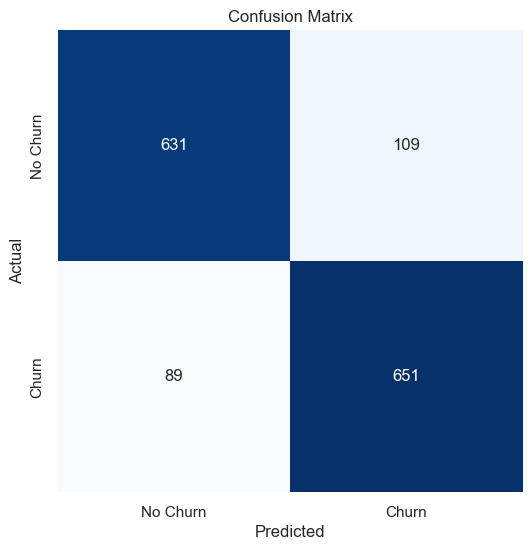

In [122]:
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### 2. Tuning Model 1 (XGBoost)

In [123]:
# Check current model parameters

current_params = xgb.get_params()
current_params

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': 42,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [124]:
# XGBoost model tuning

param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'min_child_weight': [1, 5, 10],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [0, 0.1, 0.5, 1],
    'class_weight': [None, 'balanced'],
    'criterion': ['gini', 'entropy'],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

# create model instance
xgb_model = XGBClassifier(random_state=42)

# Initialize RandomizedSearchCV
random_search_xgb = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid, scoring='accuracy',
                                     cv=5, n_jobs=-1, random_state=42, n_iter=150, verbose = 2)

# fit best estimator on train data
random_search_xgb.fit(X_train, y_train)

# best parameters
best_params = random_search_xgb.best_params_

# mean accuracy score of the best estimator
best_score = random_search_xgb.best_score_

best_params

Fitting 5 folds for each of 150 candidates, totalling 750 fits


{'n_estimators': 50,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': None,
 'criterion': 'gini',
 'class_weight': 'balanced'}

In [125]:
# mean accuracy score of the best estimator

best_score

0.852771384021384

In [126]:
# Fit tuned model on train data
tuned_xgb_model = random_search_xgb.best_estimator_
tuned_xgb_model.fit(X_train, y_train)

# original model
xgb_model.fit(X_train, y_train)

# make the predictions
random_search_xgb_pred = tuned_xgb_model.predict(X_test)
original_xgb_model = xgb.predict(X_test)

In [127]:
# Calculate the classification report

report = classification_report(y_test, original_xgb_model, output_dict=True)
report_2 = classification_report(y_test, random_search_xgb_pred, output_dict=True)

# Extract precision, recall, f1-score, and accuracy metrics for both classes

precision = ((report['1']['precision'] + report['0']['precision'])) / 2
recall = ((report['1']['recall'] + report['0']['recall'])) / 2
f1 = ((report['1']['f1-score'] + report['0']['f1-score'])) / 2

precision2 = ((report_2['1']['precision'] + report_2['0']['precision'])) / 2
recall2 = ((report_2['1']['recall'] + report_2['0']['recall'])) / 2
f12 = ((report_2['1']['f1-score'] + report_2['0']['f1-score'])) / 2

# Create dictionaries for saving metrics
metrics_original_XGB = {
    'Total Precision': precision,
    'Total Recall': recall,
    'Total F1-Score': f1,
    'Accuracy': report['accuracy']
}

metrics_Tuned_XGB = {
    'Total Precision': precision2,
    'Total Recall': recall2,
    'Total F1-Score': f12,
    'Accuracy': report_2['accuracy']
}

# Create DataFrames from the metrics dictionaries
metrics_df_original = pd.DataFrame(metrics_original_XGB, index=['Original XGBoost'])
metrics_df_xgb = pd.DataFrame(metrics_Tuned_XGB, index=['Tuned XGBoost'])

# Concatenate the DataFrames vertically to combine the metrics
combined_metrics_df = pd.concat([metrics_df_original, metrics_df_xgb])

combined_metrics_df

,Total Precision,Total Recall,Total F1-Score,Accuracy
Original XGBoost,0.851374,0.851351,0.851349,0.851351
Tuned XGBoost,0.846901,0.846622,0.846591,0.846622


In [128]:
# construct the confusion matrix for tuned model
confusion_matrix_xgb = confusion_matrix(y_test, random_search_xgb_pred)

confusion_matrix_xgb

array([[616, 124],
       [103, 637]], dtype=int64)

- 616 instances were correctly classified as True Negatives (TN).
- 637 instances were correctly classified as True Positives (TP).
- 124 instances were classified as False Positives (FP).
- 103 instances were classified as False Negatives (FN).

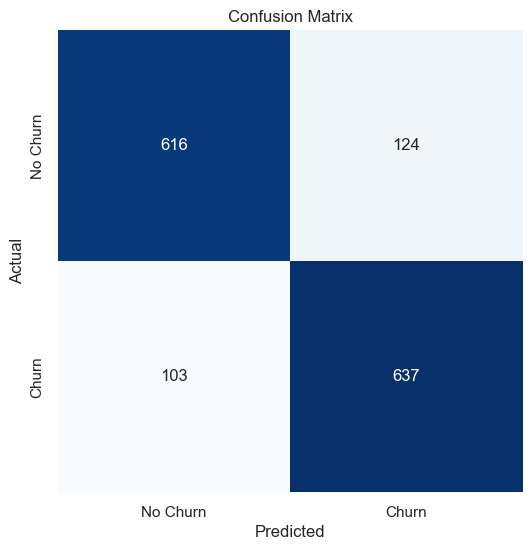

In [129]:
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix_xgb, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### 3. Tuning Model 3 (Gradient Boosting)

In [130]:
# Check current model parameters

current_params = gb.get_params()
current_params

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [131]:
# Gradient boost tuning

param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'loss': ['deviance', 'exponential'],
    'criterion': ['friedman_mse', 'mse', 'mae'],
    'min_impurity_decrease': [0.0, 0.1, 0.2],
    'ccp_alpha': [0.0, 0.1, 0.2]
}

# create model instance
gb_model = GradientBoostingClassifier(random_state=42)

# Initialize RandomizedSearchCV
random_search_gb = RandomizedSearchCV(estimator=gb_model, param_distributions=param_grid, scoring='accuracy',
                                      cv=5,n_jobs=-1, n_iter=150, random_state=42, verbose = 2)

# fit best estimator on train data
random_search_gb.fit(X_train, y_train)

# best parameters
best_params = random_search_gb.best_params_

# mean accuracy score of the best estimator
best_score = random_search_gb.best_score_

best_params

Fitting 5 folds for each of 150 candidates, totalling 750 fits


{'subsample': 1.0,
 'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_impurity_decrease': 0.2,
 'max_features': 'sqrt',
 'max_depth': 10,
 'loss': 'exponential',
 'learning_rate': 0.2,
 'criterion': 'friedman_mse',
 'ccp_alpha': 0.0}

In [132]:
# mean accuracy score of the best estimator

best_score

0.8519270750039981

In [133]:
# Fit tuned model on train data
tuned_gb_model = random_search_gb.best_estimator_
tuned_gb_model.fit(X_train, y_train)

# original model
gb_model.fit(X_train, y_train)

# make the predictions
random_search_gb_pred = tuned_gb_model.predict(X_test)
original_gb_model = gb_model.predict(X_test)

In [134]:
# Calculate the classification report

report = classification_report(y_test, original_gb_model, output_dict=True)
report_2 = classification_report(y_test, random_search_gb_pred, output_dict=True)


# Extract precision, recall, f1-score, and accuracy metrics for both classes

precision = ((report['1']['precision'] + report['0']['precision'])) / 2
recall = ((report['1']['recall'] + report['0']['recall'])) / 2
f1 = ((report['1']['f1-score'] + report['0']['f1-score'])) / 2

precision2 = ((report_2['1']['precision'] + report_2['0']['precision'])) / 2
recall2 = ((report_2['1']['recall'] + report_2['0']['recall'])) / 2
f12 = ((report_2['1']['f1-score'] + report_2['0']['f1-score'])) / 2

# Create dictionaries for metrics
metrics_original_GB = {
    'Total Precision': precision,
    'Total Recall': recall,
    'Total F1-Score': f1,
    'Accuracy': report['accuracy']
}

metrics_Tuned_GB = {
    'Total Precision': precision2,
    'Total Recall': recall2,
    'Total F1-Score': f12,
    'Accuracy': report_2['accuracy']
}

# Create DataFrames from the metrics dictionaries
metrics_df_original = pd.DataFrame(metrics_original_GB, index=['Original Gradient Boosting'])
metrics_df_gb = pd.DataFrame(metrics_Tuned_GB, index=['Tuned Gradient Boosting'])

# Concatenate the DataFrames vertically to combine the metrics
combined_metrics_df = pd.concat([metrics_df_original, metrics_df_gb])

combined_metrics_df

,Total Precision,Total Recall,Total F1-Score,Accuracy
Original Gradient Boosting,0.845506,0.844595,0.844492,0.844595
Tuned Gradient Boosting,0.855572,0.855405,0.855389,0.855405


- This model has some improvement on accuracy after tuning, from 0.84 to 0.86

In [135]:
# construct the confusion matrix for tuned model
confusion_matrix_gb = confusion_matrix(y_test, random_search_gb_pred)

confusion_matrix_gb

array([[625, 115],
       [ 99, 641]], dtype=int64)

- 625 instances were correctly classified as True Negatives (TN).
- 641 instances were correctly classified as True Positives (TP).
- 115 instances were classified as False Positives (FP).
- 99 instances were classified as False Negatives (FN).

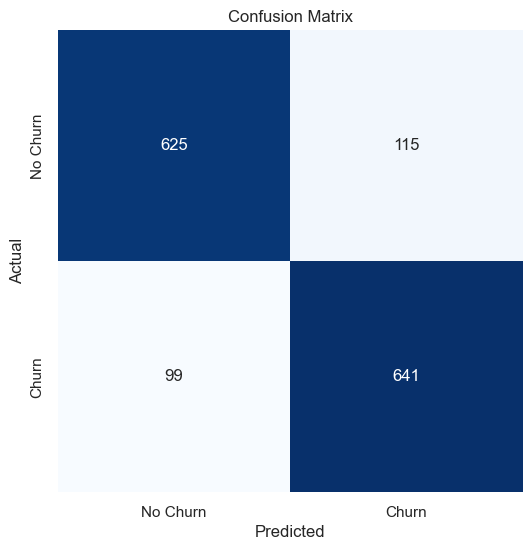

In [136]:
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix_gb, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

- After tuning all our models, the Random Forest Model has the highest accuracy of 0.869595(**87%**). We will save this model and use it on unseen data to make predictions.

## Export key components
Here is the section to **export** the important ML objects that will be use to develop an app: *Encoder, Scaler, ColumnTransformer, Model, Pipeline, etc*.

In [137]:
destination = "Toolkit"

#create a directory if it doesn't exist
if not os.path.exists(destination):
    os.makedirs(destination)

#Create a dictionary  to store the object and their filename
models ={
    "model":rf_model,
}

#Loop through the model and save using joblib.dump()
for name,model in models.items():
    file_path =os.path.join(destination,f"{name}.joblib")
    joblib.dump(model,file_path)

## Future Predictions

#### Preprocessing of test data

In [138]:
test = pd.read_csv('Dataset\Test_Data.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1997 entries, 0 to 1996
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1997 non-null   object 
 1   gender            1997 non-null   object 
 2   SeniorCitizen     1997 non-null   int64  
 3   Partner           1997 non-null   object 
 4   Dependents        1997 non-null   object 
 5   tenure            1997 non-null   int64  
 6   PhoneService      1997 non-null   object 
 7   MultipleLines     1997 non-null   object 
 8   InternetService   1997 non-null   object 
 9   OnlineSecurity    1997 non-null   object 
 10  OnlineBackup      1997 non-null   object 
 11  DeviceProtection  1997 non-null   object 
 12  TechSupport       1997 non-null   object 
 13  StreamingTV       1997 non-null   object 
 14  StreamingMovies   1997 non-null   object 
 15  Contract          1997 non-null   object 
 16  PaperlessBilling  1997 non-null   object 


In [139]:
# change dtype of SeniorCitizen to object

test['SeniorCitizen'] = test['SeniorCitizen'].astype('object')

In [140]:
# Create bins for Tenure column
# We do this to reduce data complexity and potentialy increase our model performance

def tenure (T):
    if T<=12:
        return 1
    elif T>12 and T<=24:
        return 2
    elif T>24 and T<=36:
        return 3
    elif T>36 and T<=48:
        return 4
    elif T>48 and T<=60:
        return 5
    else:
        return 6

test['Tenure_group']=test['tenure'].apply(lambda x: tenure(x))

In [141]:
# Store the CustomerID column before dropping it from the test data
customerID = test['customerID']

# drop columns from test set

test.drop(columns=['gender','PhoneService', 'MultipleLines', 'tenure', 'customerID'],axis = 1, inplace=True)

In [142]:
# Encoding categorical values with One-Hot ecndoder

cat_cols = ['SeniorCitizen', 'Partner', 'Dependents', 'InternetService', 'OnlineSecurity', 
            'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
            'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Tenure_group']

transformer = make_column_transformer(
    (OneHotEncoder(sparse=False), cat_cols)
)

transformed_data = transformer.fit_transform(test[cat_cols])

# Transformating back to a dataframe
transformed_df = pd.DataFrame(transformed_data, columns=transformer.get_feature_names_out())

# One-hot encoding removed an index. Let's put it back
transformed_df.index = test.index

# Joining tables
test = pd.concat([test, transformed_df], axis=1)

# Dropping old categorical columns
test.drop(cat_cols, axis=1, inplace=True)

test.head()

,MonthlyCharges,TotalCharges,onehotencoder__SeniorCitizen_0,onehotencoder__SeniorCitizen_1,onehotencoder__Partner_No,onehotencoder__Partner_Yes,onehotencoder__Dependents_No,onehotencoder__Dependents_Yes,onehotencoder__InternetService_DSL,onehotencoder__InternetService_Fiber optic,onehotencoder__InternetService_No,onehotencoder__OnlineSecurity_No,onehotencoder__OnlineSecurity_No internet service,onehotencoder__OnlineSecurity_Yes,onehotencoder__OnlineBackup_No,onehotencoder__OnlineBackup_No internet service,onehotencoder__OnlineBackup_Yes,onehotencoder__DeviceProtection_No,onehotencoder__DeviceProtection_No internet service,onehotencoder__DeviceProtection_Yes,onehotencoder__TechSupport_No,onehotencoder__TechSupport_No internet service,onehotencoder__TechSupport_Yes,onehotencoder__StreamingTV_No,onehotencoder__StreamingTV_No internet service,onehotencoder__StreamingTV_Yes,onehotencoder__StreamingMovies_No,onehotencoder__StreamingMovies_No internet service,onehotencoder__StreamingMovies_Yes,onehotencoder__Contract_Month-to-month,onehotencoder__Contract_One year,onehotencoder__Contract_Two year,onehotencoder__PaperlessBilling_No,onehotencoder__PaperlessBilling_Yes,onehotencoder__PaymentMethod_Bank transfer (automatic),onehotencoder__PaymentMethod_Credit card (automatic),onehotencoder__PaymentMethod_Electronic check,onehotencoder__PaymentMethod_Mailed check,onehotencoder__Tenure_group_1,onehotencoder__Tenure_group_2,onehotencoder__Tenure_group_3,onehotencoder__Tenure_group_4,onehotencoder__Tenure_group_5,onehotencoder__Tenure_group_6
0,84.45,1059.55,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,20.40,181.80,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,81.70,2212.55,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,79.50,2180.55,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,89.15,89.15,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [143]:
# Renaming columns

test.columns = ['MonthlyCharges', 'TotalCharges',
             'SeniorCitizen_0','SeniorCitizen_1',
             'Partner_No','Partner_Yes',
             'Dependents_No','Dependents_Yes',
             'InternetService_DSL','InternetService_Fiber','InternetService_No',
             'OnlineSecurity_No','OnlineSecurity_NoInternetService','OnlineSecurity_Yes',
             'OnlineBackup_No','OnlineBackup_NoInternetService','OnlineBackup_Yes',
             'DeviceProtection_No','DeviceProtection_NoInternetService','DeviceProtection_Yes',
             'TechSupport_No', 'TechSupport_NoInternetService','TechSupport_Yes',
             'StreamingTV_No', 'StreamingTV_NoInternetService','StreamingTV_Yes',
             'StreamingMovies_No','StreamingMovies_NoInternetService','StreamingMovies_Yes',
             'Contract_Month-to-month','Contract_One year', 'Contract_Two year',
             'PaperlessBilling_No','PaperlessBilling_Yes',
             'PaymentMethod_BankTransfer','PaymentMethod_CreditCard','PaymentMethod_ElectronicCheck','PaymentMethod_MailedCheck',
             'Tenure_group_1','Tenure_group_2', 'Tenure_group_3','Tenure_group_4', 'Tenure_group_5','Tenure_group_6',]

In [144]:
# Scaling numerical columns

cols = ['MonthlyCharges', 'TotalCharges']

scaler = StandardScaler()

test_scaled = scaler.fit_transform(test[cols])

# Create new DataFrames with the scaled values
test_scaled_df = pd.DataFrame(test_scaled, columns=cols, index=test.index)

# Drop the original unscaled columns
test.drop(cols, axis=1, inplace=True)

# Concatenate the scaled columns with the original DataFrames
test = pd.concat([test, test_scaled_df], axis=1)

test.head()

,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,InternetService_DSL,InternetService_Fiber,InternetService_No,OnlineSecurity_No,OnlineSecurity_NoInternetService,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_NoInternetService,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_NoInternetService,DeviceProtection_Yes,TechSupport_No,TechSupport_NoInternetService,TechSupport_Yes,StreamingTV_No,StreamingTV_NoInternetService,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_NoInternetService,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_BankTransfer,PaymentMethod_CreditCard,PaymentMethod_ElectronicCheck,PaymentMethod_MailedCheck,Tenure_group_1,Tenure_group_2,Tenure_group_3,Tenure_group_4,Tenure_group_5,Tenure_group_6,MonthlyCharges,TotalCharges
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.679346,-0.520729
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.448044,-0.909246
2,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.588006,-0.010377
3,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.514934,-0.024542
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.835454,-0.950256


#### Predictions

In [145]:
# Load the model
loaded_model = load('Toolkit\model.joblib')

# Predict the labels on the preprocessed test data using the trained model
predictions = loaded_model.predict(test)

# Create a DataFrame to store the predictions
predictions_df = pd.DataFrame(predictions, columns=['Predicted_Label'])

# Map the numerical predictions to 'no' and 'yes'
predictions_df['Predicted_Label'] = predictions_df['Predicted_Label'].map({0: 'No', 1: 'Yes'})

# predictions_df['customerID'] = customerID

predictions_df.value_counts()

Predicted_Label
No                 1473
Yes                 524
Name: count, dtype: int64

The predictions yielded 1443 instances classified as Not Churn and 554 instances classified as Churn.

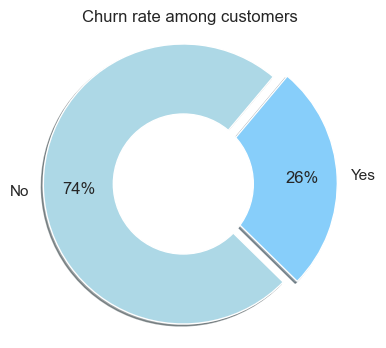

In [146]:
label_counts = predictions_df['Predicted_Label'].value_counts()

# Convert the counts to numeric values
count_values = label_counts.values
 
# Create a pie chart using pyplot to visulaize churn rate

plt.figure(figsize=(4, 4))

plt.pie(count_values, labels=label_counts.index, colors=['LightBlue','LightSkyBlue'], startangle=50, shadow=True, radius=2,
     explode=(0,0.2),autopct='%1.0f%%', pctdistance=0.75 ,  )
Circle=plt.Circle((0,0), 1, color='white')
c= plt.gcf()

c.gca().add_artist(Circle)
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is drawn as a circle.
plt.title('Churn rate among customers')
plt.show()

- Our Model was able to predict 74% customers who did not churn (majority class) and 26% (minority class). This is 1% better than our baseline of 73% (majority class).

- Our model can accurately predict on unseen data.

## Conclusion

- Number of months the customer has stayed with the company (tenure) and the contract term of the customer (contract) are the most important features that have strong correlation with churn of the customer

- Vodafone should  enhance Early Customer Experience because in the first 5-10 months,  customer tenure shows a higher churn rate, suggesting that customer experience in the initial stages is vital. Focusing on improving onboarding processes, service quality, and addressing customer concerns during this crucial period with tech support can enhance customer satisfaction and loyalty.

- Vodafone should Promote Long-Term Contracts, since the analysis indicates that customers with month-to-month contracts have a significantly higher churn rate compared to those with one-year or two-year contracts. Encouraging customers to opt for longer-term contracts through incentives, benefits, and increased tech support can potentially reduce churn rates and foster customer commitment.

- Hyperparameter tuning does not always drasitically improve model performance

- With 80/20 train/eval split, the random forest model achieved an accuracy of ~87%

- Gradient Boosting models perform well on classification tasks, compared to other regular ML models